<a href="https://colab.research.google.com/github/rouxinol/python_para_investimentos/blob/master/04_Simulando_CARTEIRA_DE_A%C3%87%C3%95ES_e_comparando_com_o_IBOVESPA_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/TiNLwmLN-iE

# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 5.5MB 5.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=432a5cd9fefc4682d8e4f9161cf2c6b973220383928d2189ce84de8aaafa4223
  Stored in directory: /tmp/pip-ephem-wheel-cache-l154s_o7/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [5]:
tickers = "hglg11.SA ITSA4.SA WEGE3.SA BRCR11.SA VALE3.SA"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
carteira.dropna(inplace=True)
carteira

,BRCR11.SA,HGLG11.SA,ITSA4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2016-02-12,81.446548,86.829498,4.010019,8.768444,10.133734
2016-02-15,81.896378,86.828514,4.016049,8.990864,9.900690
2016-02-16,82.633308,87.765862,4.076351,9.658121,9.886569
2016-02-17,83.207573,89.295235,4.094442,10.188505,9.879511
2016-02-18,83.628670,88.012543,4.022080,9.846321,9.992494
...,...,...,...,...,...
2021-02-08,88.879997,177.919998,10.600000,94.010002,85.500000
2021-02-09,88.790001,178.539993,10.690000,94.250000,85.010002
2021-02-10,88.449997,178.300003,10.620000,94.699997,86.029999


In [7]:
ibov.dropna(inplace=True)
ibov

Date
2016-02-12     39808.0
2016-02-15     40093.0
2016-02-16     40948.0
2016-02-17     41631.0
2016-02-18     41478.0
                ...   
2021-02-08    119516.0
2021-02-09    119429.0
2021-02-10    118430.0
2021-02-11    119235.0
2021-02-12    119116.0
Name: Adj Close, Length: 1238, dtype: float64

# 3. Resultados

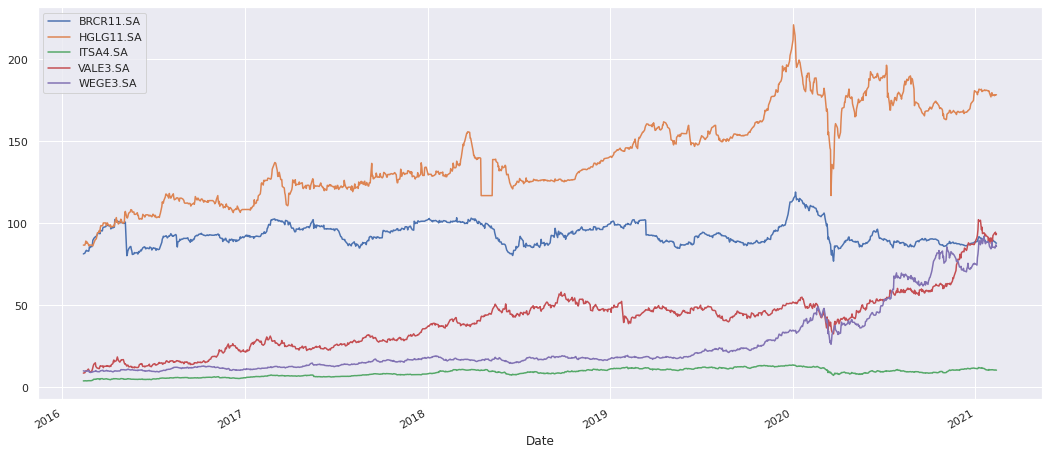

In [8]:
sns.set()
carteira.plot(figsize=(18,8));

In [9]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

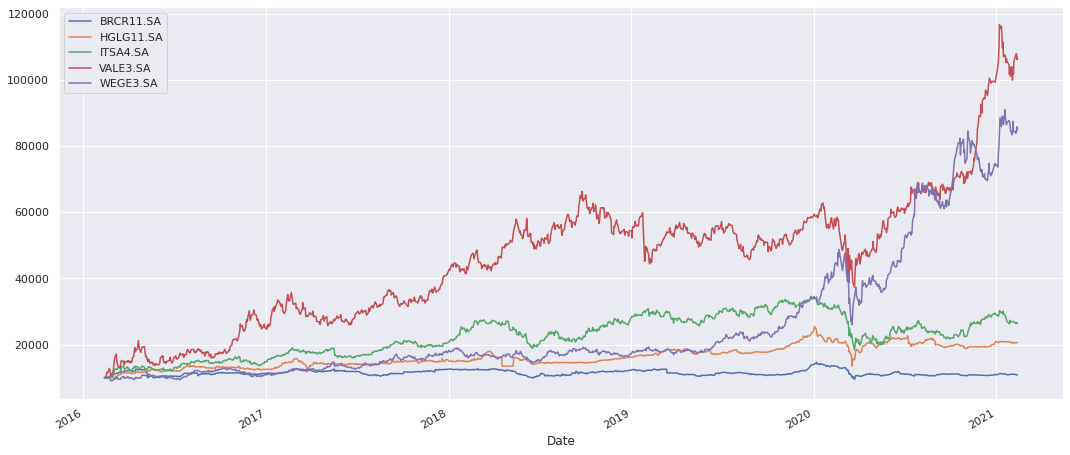

In [10]:
carteira_normalizada.plot(figsize=(18,8));

In [11]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [12]:
carteira_normalizada

,BRCR11.SA,HGLG11.SA,ITSA4.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2016-02-12,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000
2016-02-15,10055.229977,9999.886652,10015.037540,10253.659301,9770.031781,50093.845251
2016-02-16,10145.710281,10107.839299,10165.415322,11014.635027,9756.097079,51189.697008
2016-02-17,10216.218429,10283.974506,10210.529132,11619.513224,9749.132081,52079.367372
2016-02-18,10267.920657,10136.249138,10030.077459,11229.268314,9860.623810,51524.139378
...,...,...,...,...,...,...
2021-02-08,10912.678184,20490.732029,26433.788923,107214.006817,84371.666075,249422.872028
2021-02-09,10901.628441,20562.135772,26658.224747,107487.713147,83888.134659,249497.836766
2021-02-10,10859.882784,20534.496520,26483.662758,108000.913602,84894.670520,250773.626184


In [13]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2016-02-12     50000.000000
2016-02-15     50357.968248
2016-02-16     51431.872990
2016-02-17     52289.740756
2016-02-18     52097.568328
                  ...      
2021-02-08    150115.554662
2021-02-09    150006.280145
2021-02-10    148751.507235
2021-02-11    149762.610531
2021-02-12    149613.143087
Name: Adj Close, Length: 1238, dtype: float64

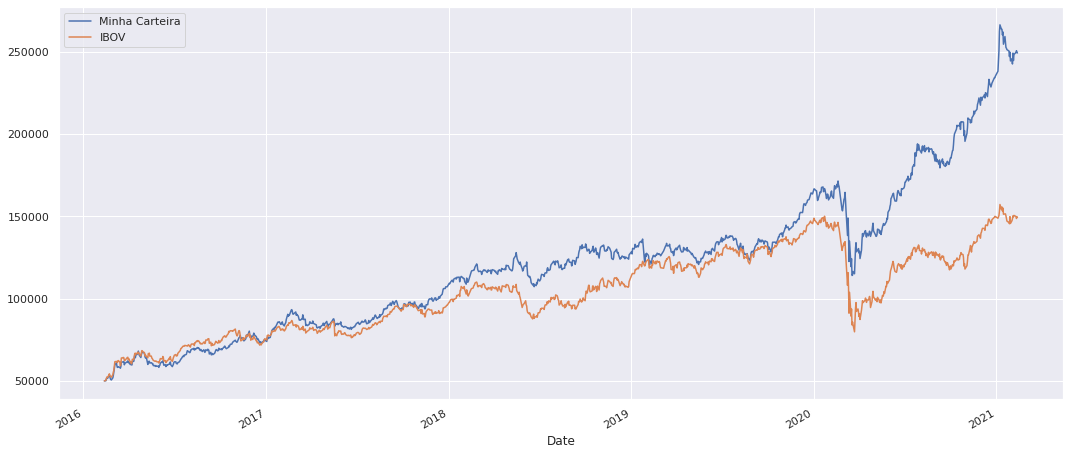

In [14]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [15]:
carteira_normalizada.describe()

,BRCR11.SA,HGLG11.SA,ITSA4.SA,VALE3.SA,WEGE3.SA,saldo
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,11438.951133,16200.473120,22468.613316,45477.231554,25240.578364,120825.847488
std,784.155106,3083.051543,6023.050541,19985.043116,19707.622014,44205.499439
min,9457.277421,9942.956261,10000.000000,10000.000000,9005.114818,50000.000000
25%,10853.156080,14079.386053,17409.838970,29675.775854,12916.923505,85364.675420
50%,11304.348274,15305.857630,22603.877464,48834.222645,17430.387192,120770.628307
75%,11970.566431,18507.534894,27235.749059,56083.742460,25999.627329,137074.089685
max,14631.348333,25468.303254,34379.424992,116691.170041,90993.114053,266513.408754
